# 1 Credit Card Fraud Detection

## 1.1 About Dataset:

The data sets contains transactions made by credit cards by cardholders. This dataset we have found 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the frauds account for 0.172% of all transactions.
It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA is Time and Amount.

## 1.2 Strategy: (the use of SMOTE and RUS techniques)

###Oversampling using SMOTE:

SMOTE (Synthetic Minority Oversampling Technique) is one of the most commonly used oversampling methods to solve the imbalance problem.

How it works:

SMOTE create elements specifically for the minority class. The algorithm picks examples from the feature space that are close to one another, draws a line connecting the examples, and then creates a new sample at a position along the line.


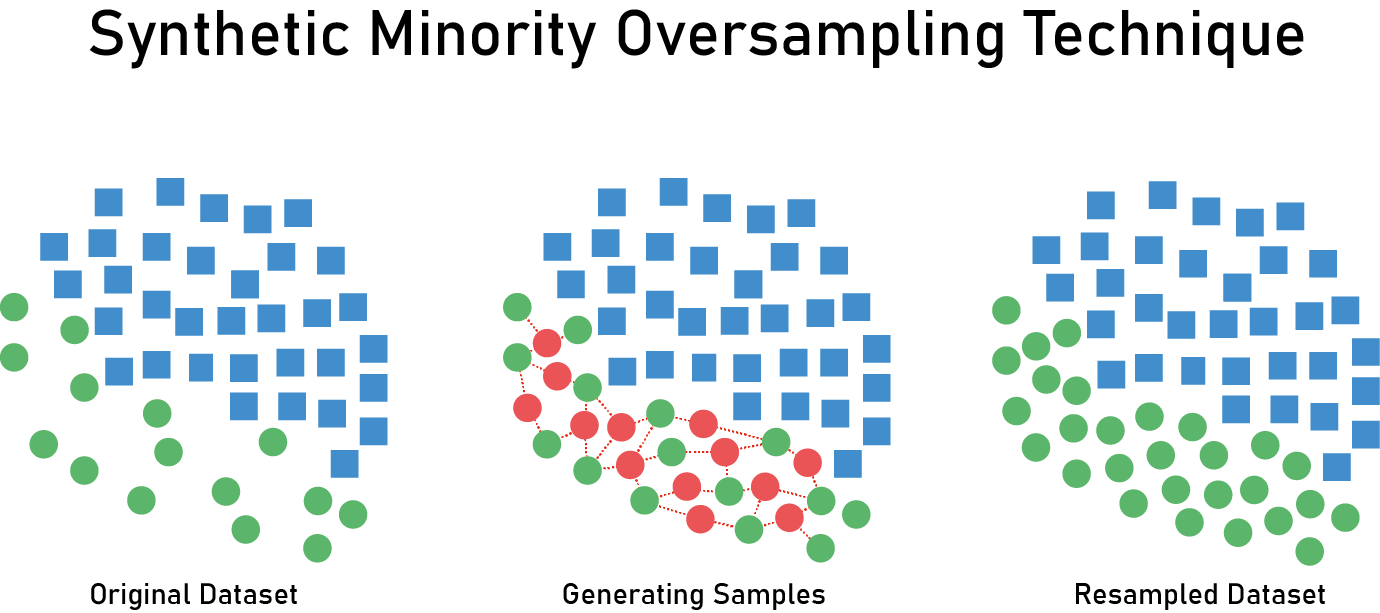


### Under sampling using Random undersampling

Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset. In the random under-sampling, the majority class instances are discarded at random until a more balanced distribution is reached.

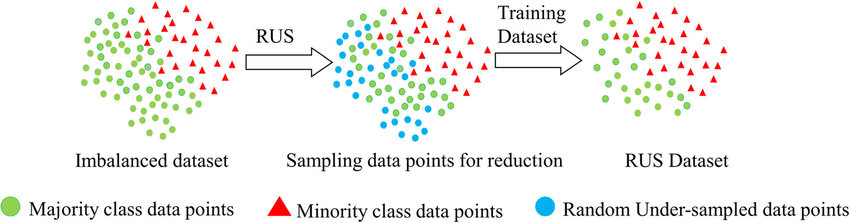

# 2 Set-Up

## 2.1 Importing Libraries

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

## 2.2 Importing Data

In [70]:
# Show full dataframe

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [71]:
raw_df = pd.read_csv('/content/creditcard.csv', on_bad_lines='skip')

In [72]:
raw_df.shape

(286799, 31)

In [73]:
raw_df = raw_df.dropna()

In [74]:
raw_df.shape

(286799, 31)

In [75]:
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [76]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286799 entries, 0 to 286798
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    286799 non-null  float64
 1   V1      286799 non-null  float64
 2   V2      286799 non-null  float64
 3   V3      286799 non-null  float64
 4   V4      286799 non-null  float64
 5   V5      286799 non-null  float64
 6   V6      286799 non-null  float64
 7   V7      286799 non-null  float64
 8   V8      286799 non-null  float64
 9   V9      286799 non-null  float64
 10  V10     286799 non-null  float64
 11  V11     286799 non-null  float64
 12  V12     286799 non-null  float64
 13  V13     286799 non-null  float64
 14  V14     286799 non-null  float64
 15  V15     286799 non-null  float64
 16  V16     286799 non-null  float64
 17  V17     286799 non-null  float64
 18  V18     286799 non-null  float64
 19  V19     286799 non-null  float64
 20  V20     286799 non-null  float64
 21  V21     28

In [77]:
raw_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,286799.0,94283.045429,47746.880608,0.000000,53547.000000,84298.000000,139114.000000,172792.000000
V1,286799.0,-0.000621,1.958010,-56.407510,-0.919541,0.018861,1.313872,2.454930
V2,286799.0,0.001798,1.649317,-72.715728,-0.595519,0.066220,0.803453,22.057729
V3,286799.0,0.005610,1.521468,-48.325589,-0.883328,0.186867,1.032755,9.382558
V4,286799.0,0.002730,1.417995,-5.683171,-0.846886,-0.019078,0.747926,16.875344
V5,286799.0,-0.001998,1.379360,-113.743307,-0.693841,-0.056803,0.609598,34.801666
V6,286799.0,0.001244,1.332132,-26.160506,-0.767269,-0.272879,0.399986,73.301626
V7,286799.0,-0.002584,1.239095,-43.557242,-0.556988,0.038125,0.568174,120.589494
V8,286799.0,0.000229,1.194219,-73.216718,-0.208174,0.022329,0.326813,20.007208
V9,286799.0,0.010168,1.106179,-13.434066,-0.638401,-0.045109,0.610433,15.594995


Feature Time contains the seconds between each transaction and the first transaction in the dataset.

The feature Amount is the transaction Amount. 

### 2.2.1 Data imbalance check

In [78]:
raw_df.Class.value_counts()

0    286293
1       506
Name: Class, dtype: int64

In [79]:
labels=["Genuine","Fraud"]

fraud_or_not = raw_df["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=raw_df['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["green","red"]
             ,title="Fraud vs Genuine transactions")
fig.show()

In [80]:
print('Genuine:', round(raw_df['Class'].value_counts()[0]/len(raw_df) * 100,3), '% of the dataset')
print('Frauds:', round(raw_df['Class'].value_counts()[1]/len(raw_df) * 100,3), '% of the dataset')

Genuine: 99.824 % of the dataset
Frauds: 0.176 % of the dataset


We are dealing with a highly imbalanced dataset.

The accuracy score will not be a hemlpful metricin this case - it will be usually high and misleading. In this dataset:

### 2.2.2 Using LazyPredict library to check some baseline models

In [ ]:
!pip install lazypredict

In [113]:
import lazypredict

In [114]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

data = raw_df

X = data.loc[:,data.columns!='Class'].values
y= data.loc[:,'Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)


In [120]:
len(y_train)

200759

In [119]:
y_train.sum()

354

In [ ]:
#Selectig initial 10 classifiers
lazypredict.Supervised.CLASSIFIERS = lazypredict.Supervised.CLASSIFIERS[:5]

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
print('all test observation:', len(y_test) )
print('number of draudulant observation:', y_test.sum() )

all test observation: 85443
number of draudulant observation: 148


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,0.86,0.86,1.00,89.78
BaggingClassifier,1.00,0.86,0.86,1.00,140.03
BernoulliNB,1.00,0.80,0.80,1.00,0.61
CalibratedClassifierCV,1.00,0.77,0.77,1.00,258.76


In [ ]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,0.86,0.86,1.00,89.78
BaggingClassifier,1.00,0.86,0.86,1.00,140.03
BernoulliNB,1.00,0.80,0.80,1.00,0.61
CalibratedClassifierCV,1.00,0.77,0.77,1.00,258.76


# 3 Data Pre-processing

In [81]:
df = raw_df.copy()

df.drop_duplicates(inplace=True)
nb_dup = raw_df.shape[0]-df.shape[0]
print("Duplicated values dropped succesfully, number of dropped elements is:", nb_dup )


Duplicated values dropped succesfully, number of dropped elements is: 3074


In [82]:
# Dropping the Time column
df = df.drop('Time', axis=1)

## 3.1 Train Test Split

The rule of thumb is: never mess up with your test set.

Before attempting oversampling or undersampling approaches, ALWAYS separate your data into test and train sets!

In [83]:
X = df.drop('Class', axis=1)
y = df['Class']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

## 3.2 Feature scaling

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way.

In [85]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## 3.3 SMOTE-RUS Implementation

If you want to undersample or oversample your data you shouldn't do it before cross validating because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem.

Exactly like we should do feature selection inside the cross validation loop, we should also oversample inside the loop.

In [86]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset using the SMOTE-RUS technique
X_train_new, y_train_new = pipeline.fit_resample(X_train_scaled, y_train)

In [87]:
print('Data has been balanced from both the classes \n', y_train_new.value_counts())

Data has been balanced from both the classes 
 0    198276
1    198276
Name: Class, dtype: int64


# 4 Model Training and Results

The confusion matrix is represented by a positive and a negative class. 

The positive class represents the not-normal class or behavior, so it is usually less represented than the other class. The negative class, on the other hand, represents normality or a normal behavior.

Recall: **The ability of a model to find all the relevant cases within a data set.** The number of true positives divided by the number of true positives plus the number of false negatives.
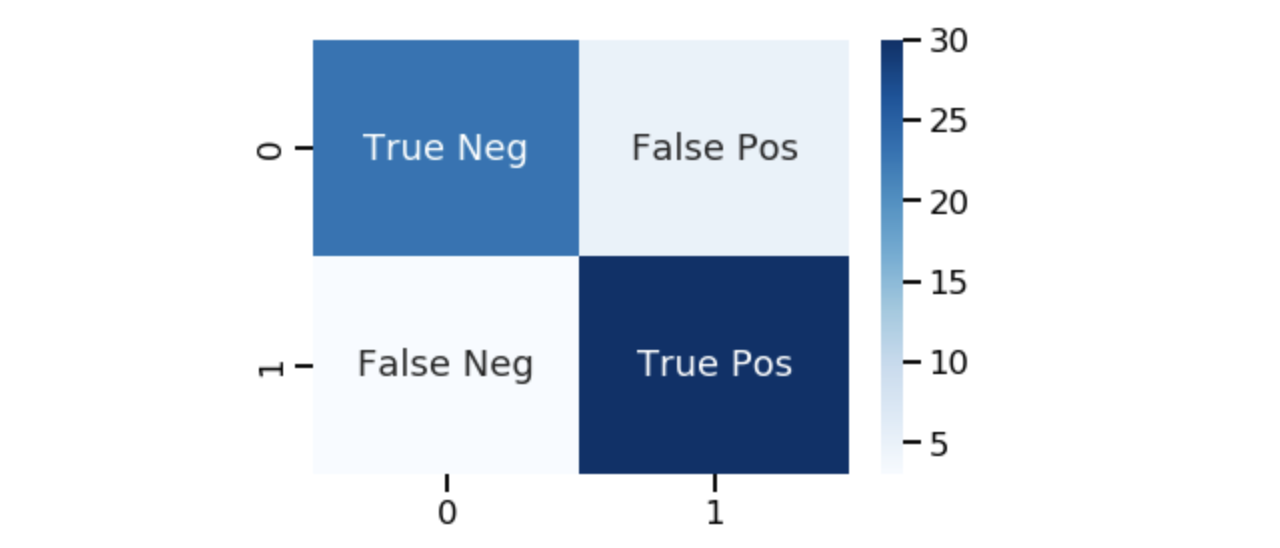

 ## 4.1Training model (RandomForestClassifier)

In [102]:
from sklearn.ensemble import RandomForestClassifier
model1= RandomForestClassifier()
model1=model1.fit(X_train_new,y_train_new)

In [103]:
y_pred = model1.predict(X_test_scaled)

In [105]:
y_test.value_counts()

0    84976
1      142
Name: Class, dtype: int64

### 4.1.1 Confusion matrix and scores

In [97]:
from sklearn.metrics import classification_report

In [98]:
target_names=['genuine transaction', 'Fraudulent transaction']

In [104]:
print(classification_report(y_test, y_pred, target_names=target_names))

                        precision    recall  f1-score   support

   genuine transaction       1.00      1.00      1.00     84976
Fraudulent transaction       0.89      0.77      0.83       142

              accuracy                           1.00     85118
             macro avg       0.94      0.89      0.91     85118
          weighted avg       1.00      1.00      1.00     85118



In [90]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

cm = confusion_matrix(y_test, y_pred)

Recall = recall_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
Accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[84963    13]
 [   32   110]]


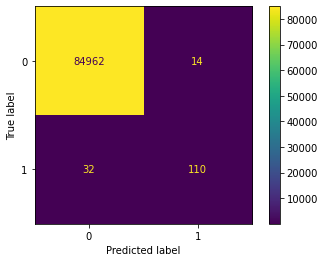

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot()

plt.show()

## 4.2 Training model (XGBoost Classifier)

In [108]:
from xgboost import XGBClassifier
model2=XGBClassifier()
model2.fit(X_train_new,y_train_new)

XGBClassifier()

In [109]:
# Calculate the accuracy
y_pred_xgb = model2.predict(X_test_scaled)

### 4.21 Confusion matrix and scores

In [110]:
print(classification_report(y_test, y_pred_xgb, target_names=target_names))

                        precision    recall  f1-score   support

   genuine transaction       1.00      0.99      0.99     84976
Fraudulent transaction       0.11      0.87      0.20       142

              accuracy                           0.99     85118
             macro avg       0.56      0.93      0.60     85118
          weighted avg       1.00      0.99      0.99     85118



In [111]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

Recall = recall_score(y_test, y_pred_xgb)
Precision = precision_score(y_test, y_pred_xgb)
F1 = f1_score(y_test, y_pred_xgb)
Accuracy = accuracy_score(y_test, y_pred_xgb)

print(cm_xgb)

[[84011   965]
 [   18   124]]


# 5 Final Result

The RandomForest model outperformed the XGBClassifier in terms of precision and F1 score, but the XGBClassifier had a better recall score.

This indicates that the RandomForest model was better at accurately predicting the true labels of the data, as reflected in its higher precision and F1 score.

However, the XGBClassifier had a higher recall score, which means it was better at correctly identifying fraudulent labels. 

In my opinion these results suggest that the RandomForest model is a better fit for the data and the specific classification task at hand.